In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [18]:
reviews = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Text Mining\\amazon reviews.csv", encoding = 'Latin-1')
reviews

,Rating,Review
0,5,Update 2: currently on 10.3.4 and after almost...
1,5,This is my review after 2 days :Screen: Coming...
2,5,Changed from a Pixel XL (1st gen first-adopter...
3,5,**Will upload photos soon**Ordered this on 28t...
4,5,Let me start with tag BOOM??It has every thing...
...,...,...
95,5,"I had a Onplus 6 earlier and after two years, ..."
96,5,"I have been using 3 devices of OP. OP3, OP6T a..."
97,5,Great camera and especially one person can rec...
98,5,"This is a long term use review, I've been usin..."


## Text Preprocessing

In [19]:
reviews = [comment.strip() for comment in reviews.Review]
reviews = [comment for comment in reviews if comment]
reviews[0:10]

["Update 2: currently on 10.3.4 and after almost a year the device is still going strong. No signs of slowing down or any kind of performance deterioration. Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly. Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10. Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors and great viewi

In [20]:
reviews_text = ' '.join(reviews)
reviews_text

'Update 2: currently on 10.3.4 and after almost a year the device is still going strong. No signs of slowing down or any kind of performance deterioration. Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly. Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10. Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors and great viewin

In [21]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Update 2 currently on 1034 and after almost a year the device is still going strong No signs of slowing down or any kind of performance deterioration Last geekbench 5 score was same as the day I got it which means oxygen os is still optimized perfectly Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolledUpdate 1 just got the new update to oxygen OS 1003 and the issues with the gaming mode are goneBeen using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10 Now here is my review broken down in Pros and Cons listProsComes with preapplied screen guard and a transparent silicon case in the boxAs always Cable quality is great and Charger is well builtDisplay quality is great and as in the spec sheet it is a HDR10 certified display which provides gorgeous colors and great viewing experienceInHand fee

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Update', '2', 'currently', 'on', '1034', 'and', 'after', 'almost', 'a', 'year', 'the', 'device', 'is', 'still', 'going', 'strong', 'No', 'signs', 'of', 'slowing', 'down', 'or', 'any', 'kind', 'of', 'performance', 'deterioration', 'Last', 'geekbench', '5', 'score', 'was', 'same', 'as', 'the', 'day', 'I', 'got', 'it', 'which', 'means', 'oxygen', 'os', 'is', 'still', 'optimized', 'perfectly', 'Only', 'drawback', 'for']


In [24]:
len(text_tokens)

34555

In [25]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Update', '2', 'currently', '1034', 'almost', 'year', 'device', 'still', 'going', 'strong', 'No', 'signs', 'slowing', 'kind', 'performance', 'deterioration', 'Last', 'geekbench', '5', 'score', 'day', 'got', 'means', 'oxygen', 'os', 'still', 'optimized', 'perfectly', 'Only', 'drawback', 'device', 'fingerprint', 'reader', 'slowly', 'starts', 'forget', 'fingers', 'doesnt', 'recognize', '2', 'fingers', 'enrolledUpdate', '1', 'got', 'new', 'update', 'oxygen', 'OS', '1003', 'issues', 'gaming', 'mode', 'goneBeen', 'using', '2', 'days', 'let', 'say', 'first', 'great', 'device', 'really', 'really', 'glad', 'bought', 'Samsung', 'Note', '10', 'Now', 'review', 'broken', 'Pros', 'Cons', 'listProsComes', 'preapplied', 'screen', 'guard', 'transparent', 'silicon', 'case', 'boxAs', 'always', 'Cable', 'quality', 'great', 'Charger', 'well', 'builtDisplay', 'quality', 'great', 'spec', 'sheet', 'HDR10', 'certified', 'display', 'provides', 'gorgeous', 'colors', 'great', 'viewing', 'experienceInHand', 'feel

In [26]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['update', '2', 'currently', '1034', 'almost', 'year', 'device', 'still', 'going', 'strong', 'no', 'signs', 'slowing', 'kind', 'performance', 'deterioration', 'last', 'geekbench', '5', 'score', 'day', 'got', 'means', 'oxygen', 'os', 'still', 'optimized', 'perfectly', 'only', 'drawback', 'device', 'fingerprint', 'reader', 'slowly', 'starts', 'forget', 'fingers', 'doesnt', 'recognize', '2', 'fingers', 'enrolledupdate', '1', 'got', 'new', 'update', 'oxygen', 'os', '1003', 'issues', 'gaming', 'mode', 'gonebeen', 'using', '2', 'days', 'let', 'say', 'first', 'great', 'device', 'really', 'really', 'glad', 'bought', 'samsung', 'note', '10', 'now', 'review', 'broken', 'pros', 'cons', 'listproscomes', 'preapplied', 'screen', 'guard', 'transparent', 'silicon', 'case', 'boxas', 'always', 'cable', 'quality', 'great', 'charger', 'well', 'builtdisplay', 'quality', 'great', 'spec', 'sheet', 'hdr10', 'certified', 'display', 'provides', 'gorgeous', 'colors', 'great', 'viewing', 'experienceinhand', 'feel

In [27]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['updat', '2', 'current', '1034', 'almost', 'year', 'devic', 'still', 'go', 'strong', 'no', 'sign', 'slow', 'kind', 'perform', 'deterior', 'last', 'geekbench', '5', 'score', 'day', 'got', 'mean', 'oxygen', 'os', 'still', 'optim', 'perfectli', 'onli', 'drawback', 'devic', 'fingerprint', 'reader', 'slowli', 'start', 'forget', 'finger', 'doesnt', 'recogn', '2', 'finger', 'enrolledupd', '1', 'got', 'new', 'updat', 'oxygen', 'os', '1003', 'issu', 'game', 'mode', 'gonebeen', 'use', '2', 'day', 'let', 'say', 'first', 'great', 'devic', 'realli', 'realli', 'glad', 'bought', 'samsung', 'note', '10', 'now', 'review', 'broken', 'pro', 'con', 'listproscom', 'preappli', 'screen', 'guard', 'transpar', 'silicon', 'case', 'boxa', 'alway', 'cabl', 'qualiti', 'great', 'charger', 'well', 'builtdisplay', 'qualiti', 'great', 'spec', 'sheet', 'hdr10', 'certifi', 'display', 'provid', 'gorgeou', 'color', 'great', 'view', 'experienceinhand', 'feel', 'also', 'great', 'devic', 'weight', 'doesnt', 'make', 'heavi',

In [28]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

update 2 currently 1034 almost year device still going strong no signs slowing kind performance deterioration last geekbench 5 score day got means oxygen os still optimized perfectly only drawback device fingerprint reader slowly starts forget fingers doesnt recognize 2 fingers enrolledupdate 1 got new update oxygen os 1003 issues gaming mode gonebeen using 2 days let say first great device really really glad bought samsung note 10 now review broken pros cons listproscomes preapplied screen guard transparent silicon case boxas always cable quality great charger well builtdisplay quality great spec sheet hdr10 certified display provides gorgeous colors great viewing experienceinhand feel also great device weight doesnt make heavy light usethe back glass slippery slippery previous oneplus devicesi big hands easily reach far corners gesture navigationperformance top notch havent used device till surpass fluidity device everything feels natural seamlessthe 90hz display great adds faster ex

In [29]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['update', '2', 'currently', '1034', 'almost', 'year', 'device', 'still', 'go', 'strong', 'no', 'sign', 'slow', 'kind', 'performance', 'deterioration', 'last', 'geekbench', '5', 'score', 'day', 'got', 'mean', 'oxygen', 'os', 'still', 'optimize', 'perfectly', 'only', 'drawback', 'device', 'fingerprint', 'reader', 'slowly', 'start', 'forget', 'finger', 'do', 'not', 'recognize', '2', 'finger', 'enrolledupdate', '1', 'get', 'new', 'update', 'oxygen', 'os', '1003', 'issue', 'gaming', 'mode', 'gonebeen', 'use', '2', 'day', 'let', 'say', 'first', 'great', 'device', 'really', 'really', 'glad', 'buy', 'samsung', 'note', '10', 'now', 'review', 'break', 'pro', 'con', 'listproscome', 'preapplied', 'screen', 'guard', 'transparent', 'silicon', 'case', 'boxas', 'always', 'cable', 'quality', 'great', 'charger', 'well', 'builtdisplay', 'quality', 'great', 'spec', 'sheet', 'hdr10', 'certify', 'display', 'provide', 'gorgeous', 'color', 'great', 'view', 'experienceinhand', 'feel', 'also', 'great', 'device

In [30]:
clean_reviews=' '.join(lemmas)
clean_reviews

'update 2 currently 1034 almost year device still go strong no sign slow kind performance deterioration last geekbench 5 score day got mean oxygen os still optimize perfectly only drawback device fingerprint reader slowly start forget finger do not recognize 2 finger enrolledupdate 1 get new update oxygen os 1003 issue gaming mode gonebeen use 2 day let say first great device really really glad buy samsung note 10 now review break pro con listproscome preapplied screen guard transparent silicon case boxas always cable quality great charger well builtdisplay quality great spec sheet hdr10 certify display provide gorgeous color great view experienceinhand feel also great device weight do not make heavy light usethe back glass slippery slippery previous oneplus devicesi big hand easily reach far corner gesture navigationperformance top notch have not use device till surpass fluidity device everything feel natural seamlessthe 90hz display great add fast experience devicespeaker good asus r

## Feature Extraction

### CountVectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [40]:
print(cv.vocabulary_)

{'update': 3919, 'currently': 1020, '1034': 22, 'almost': 394, 'year': 4167, 'device': 1126, 'still': 3586, 'go': 1613, 'strong': 3609, 'no': 2631, 'sign': 3423, 'slow': 3462, 'kind': 2246, 'performance': 2854, 'deterioration': 1123, 'last': 2267, 'geekbench': 1583, 'score': 3305, 'day': 1054, 'got': 1632, 'mean': 2440, 'oxygen': 2805, 'os': 2764, 'optimize': 2752, 'perfectly': 2849, 'only': 2728, 'drawback': 1222, 'fingerprint': 1465, 'reader': 3124, 'slowly': 3464, 'start': 3572, 'forget': 1517, 'finger': 1464, 'do': 1198, 'not': 2642, 'recognize': 3142, 'enrolledupdate': 1298, 'get': 1593, 'new': 2616, '1003': 11, 'issue': 2177, 'gaming': 1574, 'mode': 2514, 'gonebeen': 1618, 'use': 3953, 'let': 2297, 'say': 3290, 'first': 1474, 'great': 1644, 'really': 3130, 'glad': 1605, 'buy': 729, 'samsung': 3282, 'note': 2648, '10': 7, 'now': 2658, 'review': 3215, 'break': 676, 'pro': 3017, 'con': 915, 'listproscome': 2332, 'preapplied': 2975, 'screen': 3310, 'guard': 1659, 'transparent': 3837,

In [41]:
print(reviewscv.toarray()[50:250])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(reviewscv.toarray().shape)

(20838, 4190)


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [43]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [47]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [50]:
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Generate Word Cloud

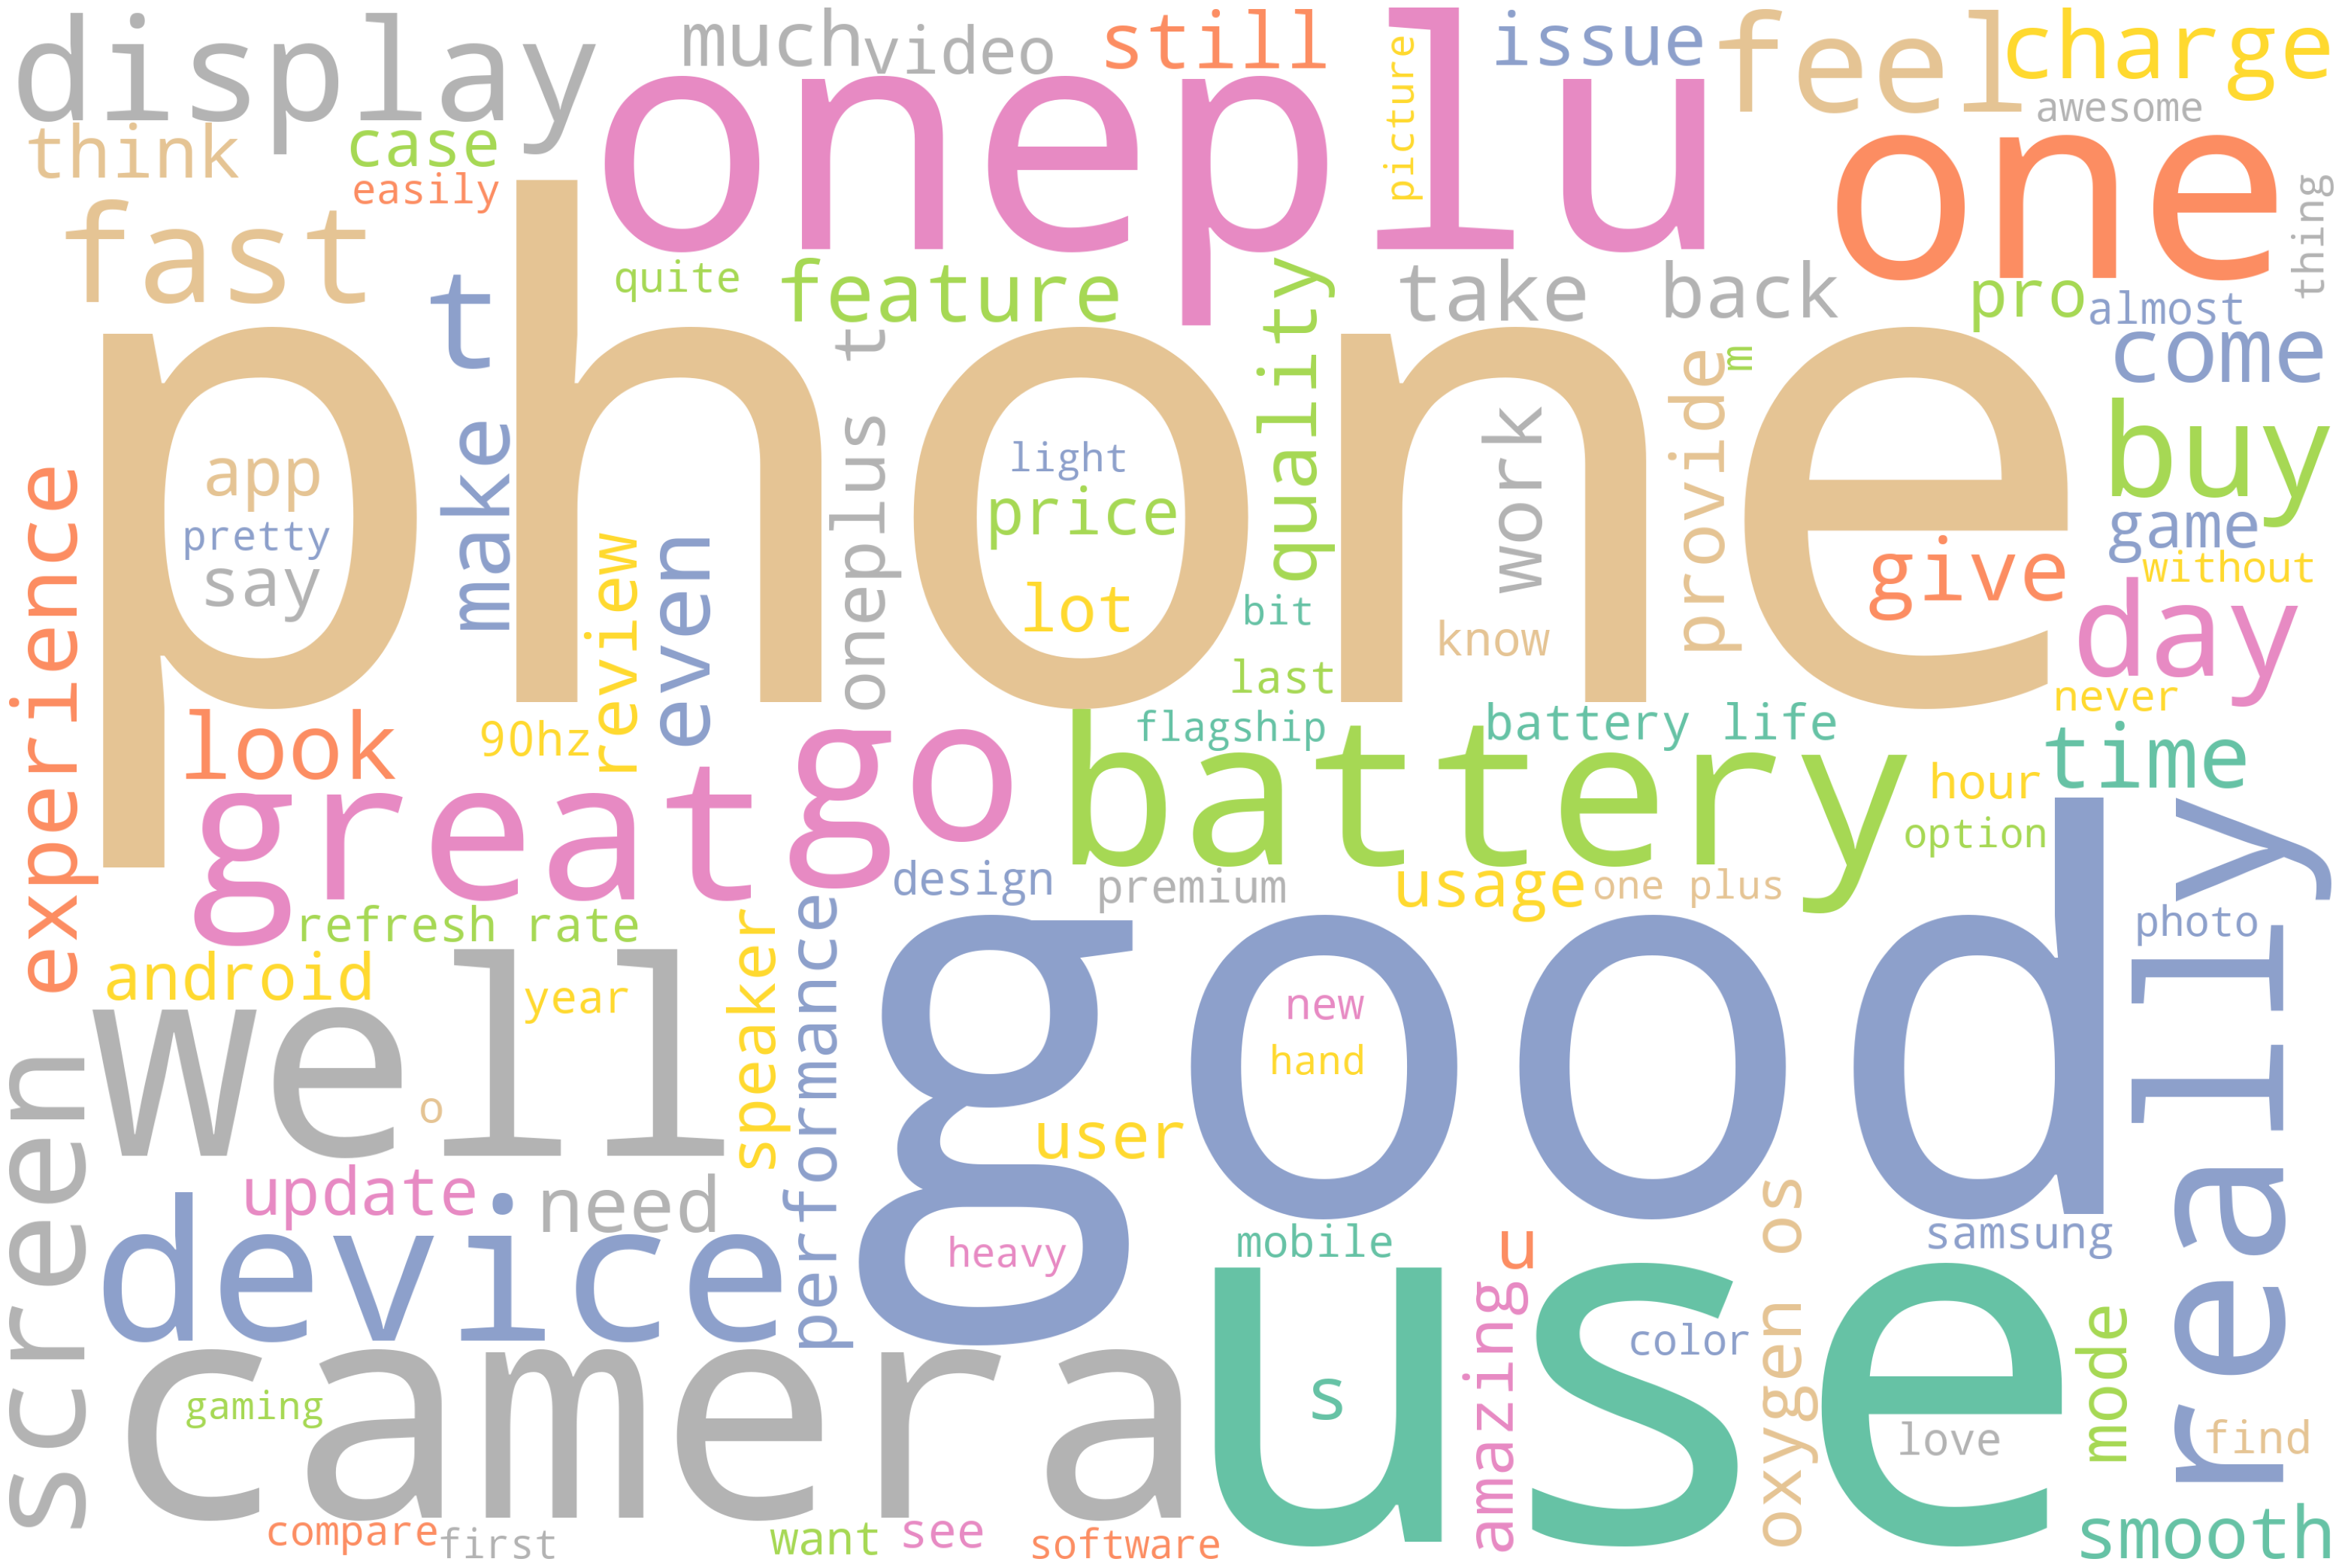

In [51]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [52]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [53]:
for token in doc_block[100:200]:
    print(token,token.pos_)

view NOUN
experienceinhand NOUN
feel VERB
also ADV
great ADJ
device NOUN
weight NOUN
do AUX
not PART
make VERB
heavy ADJ
light NOUN
usethe VERB
back ADJ
glass NOUN
slippery NOUN
slippery ADJ
previous ADJ
oneplus NOUN
devicesi NOUN
big ADJ
hand NOUN
easily ADV
reach VERB
far ADJ
corner NOUN
gesture NOUN
navigationperformance PROPN
top ADJ
notch NOUN
have AUX
not PART
use VERB
device NOUN
till SCONJ
surpass ADJ
fluidity NOUN
device NOUN
everything PRON
feel VERB
natural ADJ
seamlessthe NOUN
90hz ADJ
display NOUN
great ADJ
add VERB
fast ADJ
experience NOUN
devicespeaker NOUN
good ADJ
asus NOUN
rog VERB
phone NOUN
2 NUM
iphone NOUN
xs PROPN
pro PROPN
max VERB
great ADJ
price NOUN
range NOUN
may AUX
equal VERB
samsung PROPN
note PROPN
seriescall PROPN
quality NOUN
great ADJ
jio PROPN
vodafone PROPN
network NOUN
mic INTJ
also ADV
perform VERB
great ADJ
job NOUN
cancel VERB
ambient PROPN
noise PROPN
party PROPN
hear VERB
voice NOUN
clearly ADV
loudspeaker VERB
normal ADJ
modescharging NOUN
sp

In [54]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['device', 'charge', 'tot', 'hour', 'oxygen', 'fluid', 'say', 'bug', 'fix', 'camera', 'situation', 'light', 'software', 'optimize', 'go', 'camera', 'setup', 'camera', 'make', 'use', 'software', 'lot', 'picture', 'come', 'color', 'fade', 'bit', 'noise', 'liking', 'go', 'shotsbattery', 'life', 'get', 'screen', 'time', 'usage', 'deviceconshardware', 'device', 'software', 'bit', 'bug', 'need', 'improvementthere', 'bug', 'game', 'app', 'screen', 'go', 'o', 'lock', 'device', 'unlock', 'use', 'face', 'unlock', 'get', 'game', 'camera', 'software', 'optimize', 'yetbattery', 'life', 'issue', 'usersthe', 'navigation', 'gesture', 'grace', 'android', 'screen', 'slow', 'need', 'lot', 'get', 'come', 'oneplus', 'gesture', 'mention', 'issue', 'feel', 'use', 'side', 'ridge', 'provide', 'case', 'put', 'pressure', 'thumb', 'dig', 'edge', 'display', 'ridge', 'case', 'get', 'work', 'everytime', 'switch', 'button', 'navigation', 'httpsimagesnasslimagesamazoncomimagesi711llcxmallsy88jpg', 'review']


In [55]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,431
1,camera,234
2,use,228
3,oneplus,184
4,battery,176
5,charge,141
6,screen,132
7,display,132
8,get,124
9,go,107


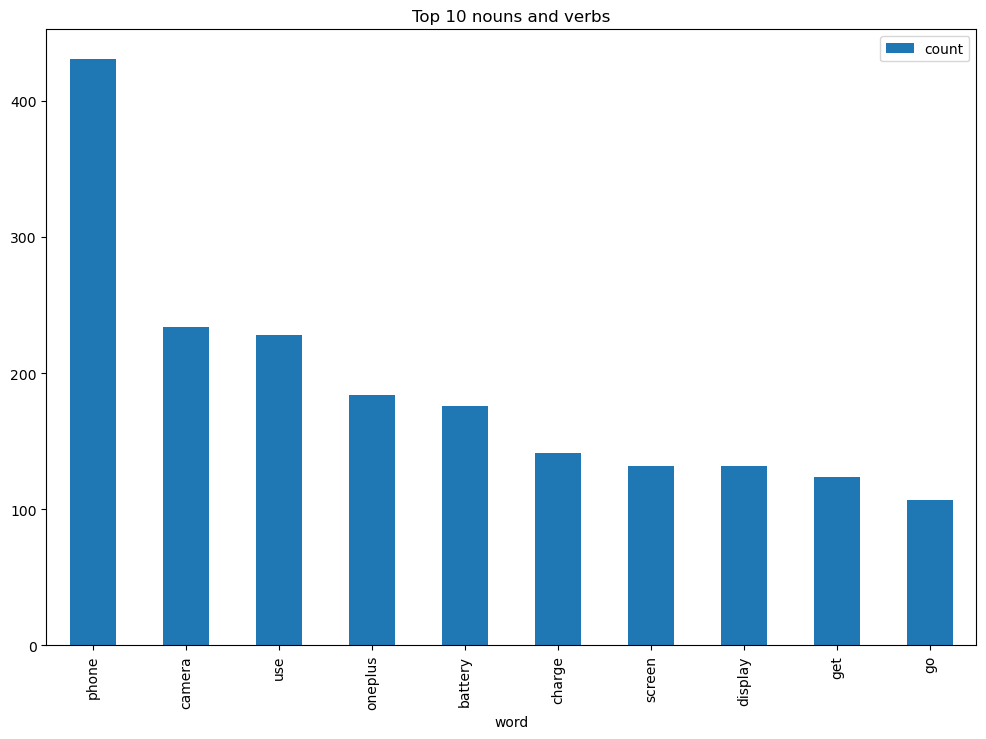

In [56]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [57]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Update 2: currently on 10.3.4 and after almost a year the device is still going strong.',
 'No signs of slowing down or any kind of performance deterioration.',
 'Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly.',
 'Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10.',
 "Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors

In [58]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Update 2: currently on 10.3.4 and after almost...
1,No signs of slowing down or any kind of perfor...
2,Last geekbench 5 score was same as the day I g...
3,Only drawback for this device is fingerprint r...
4,Now here is my review broken down in Pros and ...
...,...
1785,I'm a mobile phone gamer...
1786,"I'm playing COD, PUBG, COC and FIFA on a daily..."
1787,No much heating issues Ive noticed on normal u...
1788,It's really bang for a buck if yu know how to ...


In [59]:
# Emotion Lexicon - Affin
affin = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Text Mining\\Afinn.csv", sep=',', encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [60]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [61]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [62]:
# manual testing
calculate_sentiment(text='good service')

3

In [63]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        2
1        1
2        3
3        5
4       16
        ..
1785     0
1786    -1
1787    -1
1788     0
1789     9
Name: sentiment_value, Length: 1790, dtype: int64

In [64]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        16
1        11
2        20
3        77
4       109
       ... 
1785      5
1786     46
1787      9
1788     16
1789     10
Name: word_count, Length: 1790, dtype: int64

In [65]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
267,"Snapdragon 855+ - Multitasking don't worry, ga...",-9,18
1669,Operating system... One plus is using the oxyg...,-8,41
1427,However i do miss 3.5 mm jack... what's the pr...,-6,33
746,"In summary, nothing comes close to a Samsung A...",-5,35
1411,Any regular user firstly who doesn't know much...,-5,20
...,...,...,...
1556,Only drawback in using GCam is that auxiliary ...,19,71
1361,I bought the phone back in Dec 2019 ...I still...,20,256
69,Charge for 20min and enjoy full day battery .9...,22,112
373,OP 7T is the best of OP 7 and OP 7 pro at a go...,27,309


In [66]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1790.000000
mean        1.546927
std         2.989039
min        -9.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        31.000000
Name: sentiment_value, dtype: float64

In [67]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
5,I haven't used any device till now that can su...,0,15
11,"They are slow, Clumsy and needs a lot of getti...",0,21
12,Not to mention the issues I feel while using t...,0,21
13,I have to literally put pressure on the thumb ...,-1,39
14,https://images-na.ssl-images-amazon.com/images...,-2,37
...,...,...,...
1784,https://images-na.ssl-images-amazon.com/images...,0,42
1785,I'm a mobile phone gamer...,0,5
1786,"I'm playing COD, PUBG, COC and FIFA on a daily...",-1,46
1787,No much heating issues Ive noticed on normal u...,-1,9


In [68]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Update 2: currently on 10.3.4 and after almost...,2,16
1,No signs of slowing down or any kind of perfor...,1,11
2,Last geekbench 5 score was same as the day I g...,3,20
3,Only drawback for this device is fingerprint r...,5,77
4,Now here is my review broken down in Pros and ...,16,109
...,...,...,...
1779,-Expensive like 37999 for a smartphone so be p...,3,11
1781,- Macro camera and wideangle shots come really...,3,12
1782,-Oreo shaped camera some people like that some...,6,17
1783,-Network connectivity is by far the best in th...,3,20


In [69]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Update 2: currently on 10.3.4 and after almost...,2,16,0
1,No signs of slowing down or any kind of perfor...,1,11,1
2,Last geekbench 5 score was same as the day I g...,3,20,2
3,Only drawback for this device is fingerprint r...,5,77,3
4,Now here is my review broken down in Pros and ...,16,109,4
...,...,...,...,...
1785,I'm a mobile phone gamer...,0,5,1785
1786,"I'm playing COD, PUBG, COC and FIFA on a daily...",-1,46,1786
1787,No much heating issues Ive noticed on normal u...,-1,9,1787
1788,It's really bang for a buck if yu know how to ...,0,16,1788


C:\Users\prati\AppData\Local\Temp\ipykernel_10692\3324071075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

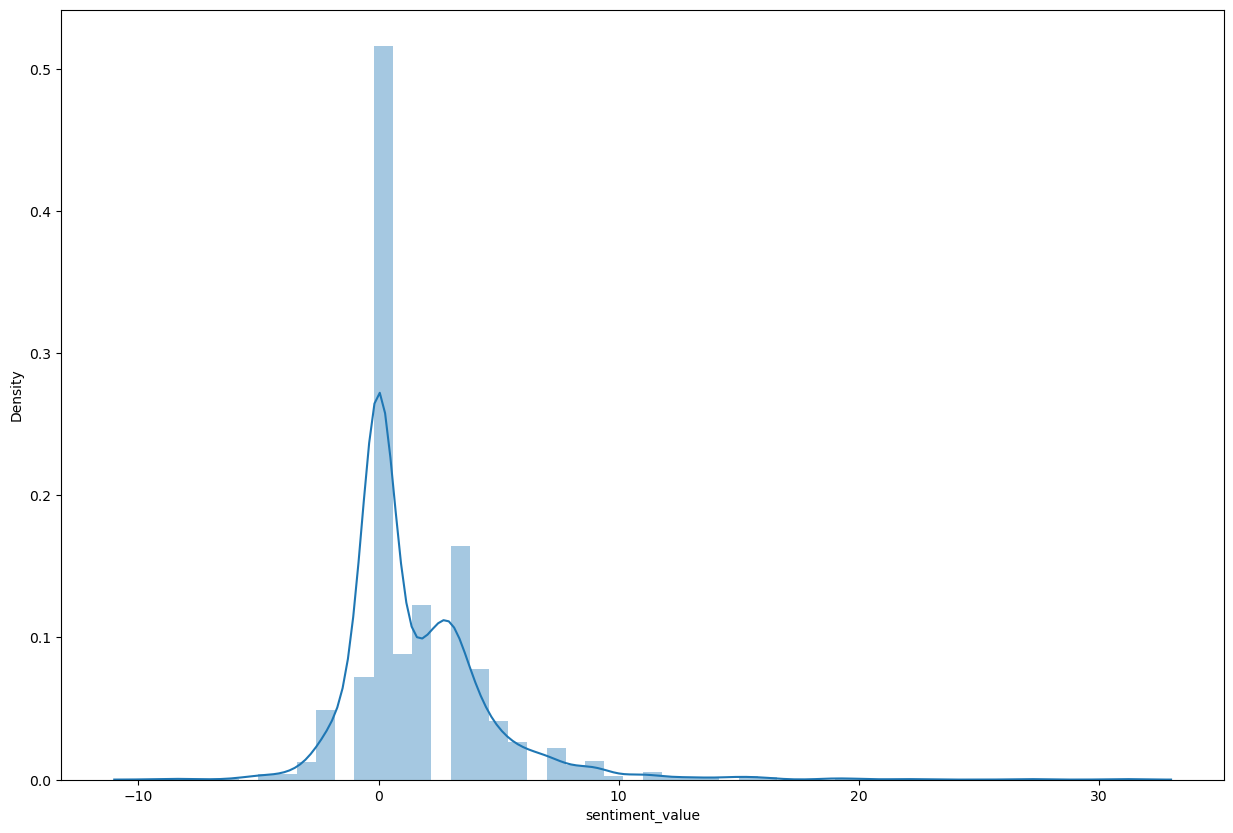

In [70]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

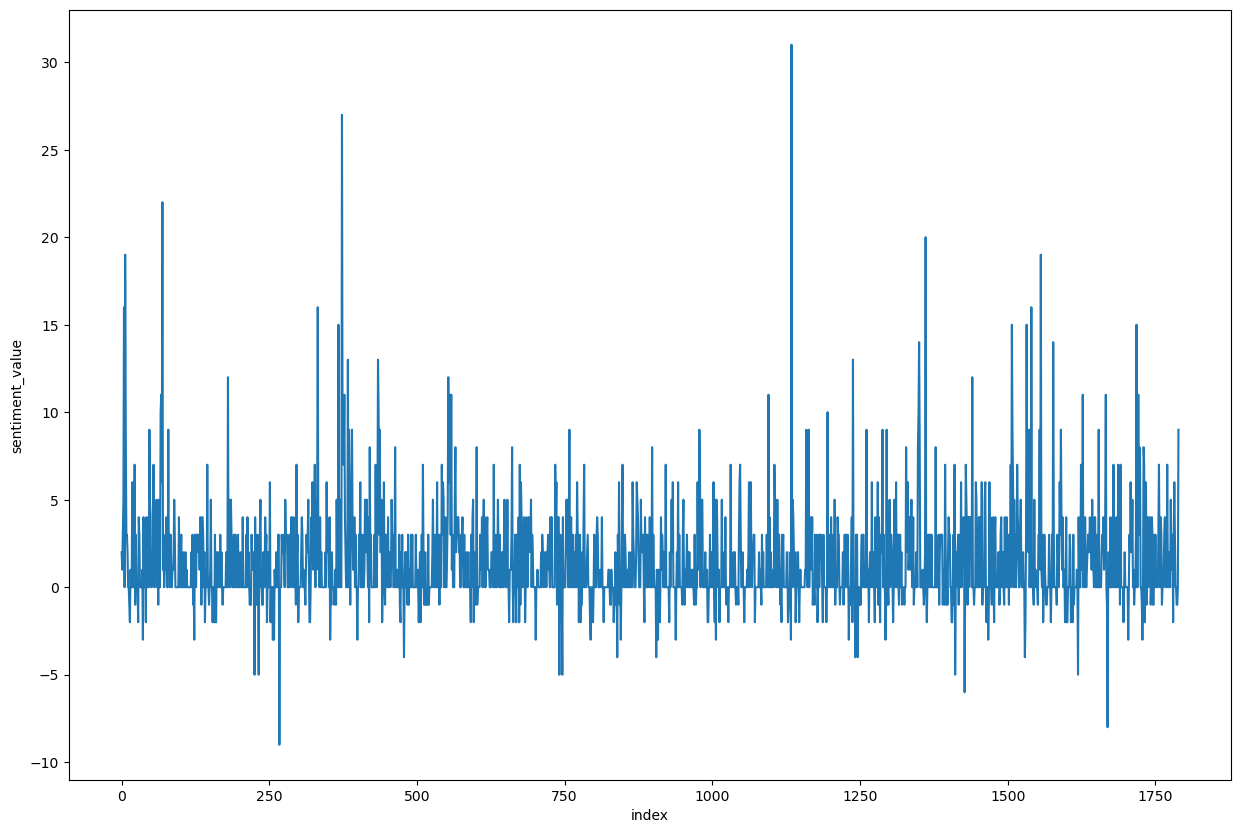

In [71]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

### End